## Principal Component Analysis

#### Business Problem

We have a dataset of Wine's. We are given 3 types of wines, the chemical composition of wines as independent variables and Customer segments corresponding to them. With this dataset, we can classify to which customer segment the new wine belongs. But we cannot visualize this because we have too many independent variables( 13 dimensions ). We need to perform PCA to extract 2 features which explain the most variance and visualize the prediction regions and boundries.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Loading the dataset into variables
dataset = pd.read_csv('Wine.csv')
rows, columns = dataset.shape
dataset.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [4]:
# Checking the values of X and y
print("X Values")
print(["{0:0.2f}".format(i) for i in X[0,:]])
print("\nY Values")
print(y[:10])

X Values
['14.23', '1.71', '2.43', '15.60', '127.00', '2.80', '3.06', '0.28', '2.29', '5.64', '1.04', '3.92', '1065.00']

Y Values
[1 1 1 1 1 1 1 1 1 1]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train Dimensions: ",X_train.shape)
print("X_test Dimensions: ",X_test.shape)

X_train Dimensions:  (142, 13)
X_test Dimensions:  (36, 13)


###### Applying PCA

From the m independent variables of the dataset, PCA extracts p <= m new independent variables that explain the most the variance of the dataset, regardless of the dependent variable. 

The fact that the dependent variable is not considered makes PCA an unsupervised model.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_test = pca.fit_transform(X_train)
X_test_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[ 0.36884109  0.19318394  0.10752862  0.07421996  0.06245904  0.04909
  0.04117287  0.02495984  0.02308855  0.01864124  0.01731766  0.01252785
  0.00696933]


In the above data we can see that the variables are ordered in decreasing order of the variance they contribute to the dataset. So the first 2 variables contribute to 56% of the variance. So we will set the number of components we want fit transform our X_train and X_test

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("X_train Dimensions: ",X_train.shape)
print("X_test Dimensions: ",X_test.shape)

X_train Dimensions:  (142, 2)
X_test Dimensions:  (36, 2)


In [9]:
# Fitting Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# Predicting the Test Set results
y_pred = classifier.predict(X_test)
print("y_test Values:", y_test)                            
print("\ny_pred Values:", y_pred)

y_test Values: [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]

y_pred Values: [1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


Now since we have 3 classes, we have a confusion matrix of 3X3. The diagonals represent the correct predictions for each class. We have just 1 wrong prediction where it acutally belongs to segment 1 but was predicted as segment 2.

###### Visualising the Training set results

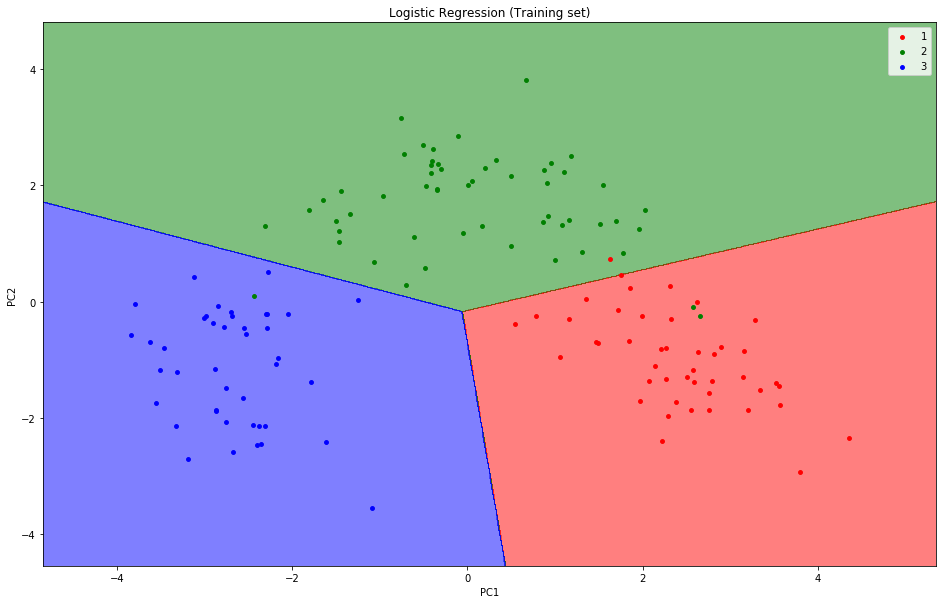

In [12]:
# This library helps us colorize our data points 
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 16, 10
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
# This function makes the contour between the two regions.
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green', 'blue')))
# Here we plot the graph values
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Here we print the actual values of the training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j,s=15)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

###### Visualising the Test set results

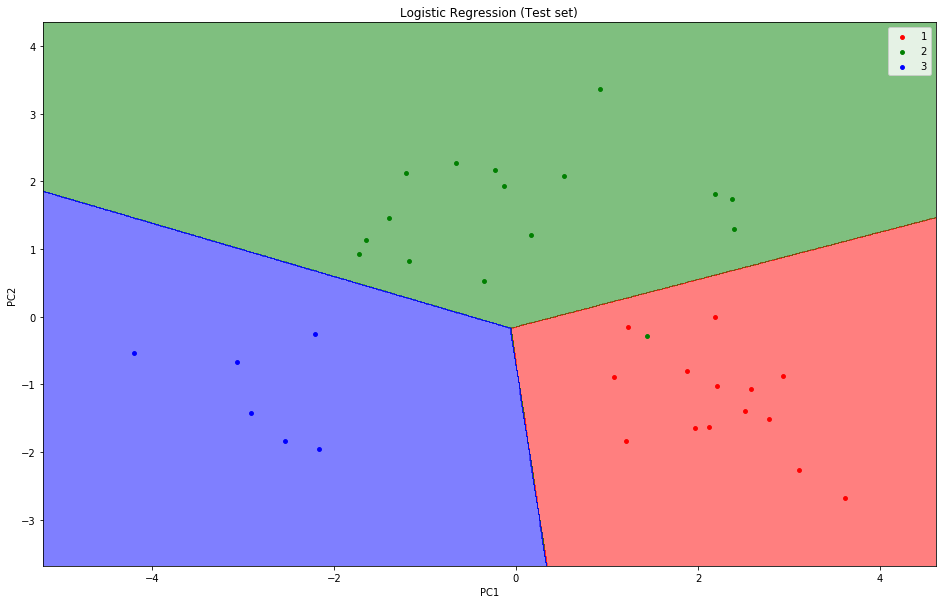

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1,
              step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(
                 X1.shape),
             alpha=0.50, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j,s=15)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()